### Discrete phase space based on finite fields - Wootters (2005)

Como menciona varias veces en sus distintos trabajos, la característica principal que se desea preservar de la función de Wigner continuo al caso discreto, es que al sumar la función de Wigner en ciertas direcciones se obtienen distribuciones de probabilidad de observables asociados a esas direcciones. Ésta propiedad es fundamental para la tomografía cuántica.

El espacio discreto en donde se estará trabajando requiere de algunas propiedades geométricas del plano, por ejemplo el concepto de lineas paralelas. Para ésto se requiere que los ejes de nuestro espacio tomen valores de un *campo finito*. Por lo tanto el método de Wootters solo aplica para sistemas de $N = p^n$ done $p$ es un número primo. Se impone una estructura cuántica al espacio de fase discreto al asignar un estado cuántico a cada linea del espacio de fase. Ésta asignación satisface una restricción importante, llamada *covarianza bajo traslación*. La asignación no es única, y cada asignación nos brinda una función de Wigner distinta. 

El método de Wootters nos lleva de manera natural a una técnica de tomografía cuántica. Cada conjunto completo de lineas paralelas (*estría*) en el espacio de fase discreto se asocia con una medición particular del sistema cuántico, especificamente con una base ortogonal del espacio de Hilbert. Mediante una determinación experimental de las probabilidades de los resultados del experimento, podemos obtener información sobre la función de Wigner, especificamente la suma de la función de Wigner sobre cada una de las lineas paralelas. La suma sobre todas las lineas del espacio son suficientes para reconstruir a toda la función de Wigner y por lo tanto determinar el espacio de fase.

Más aún, las bases ortogonales que se asocian a conjuntos de lineas paralelas resultan ser *mutuamente insesgadas*, es decir, cada vector en las otras bases es una superposición equitativa de los vectores en cualquier otro estado. Una consecuencia es que el esquema tomográfico presentado por Wootters involucra menos mediciones distintas que otros esquemas derivados a partir de distintos espacios de fase discretos.

El espacio de fase discreto es un espacio vectorial de dos dimensiones sobre un campo finito. La cardinalidad $N$ del campo finito en cuestión depende de la dimensión del sistema cuántico. Visualizamos el espacio como una arreglo de $N \times N$ de puntos $(q,p)$ donde $q$ corre sobre el eje horizontal y $p$ sobre el eje vertical. Sin pérdida de generalidad fijamos el  origin en la parte inferior izquierda.

Una linea en el espacio de fase es el conjunto de puntos que satisfacen una ecuación de la forma $aq + bp = c$ donde $a,b$ y $c \in \mathbb F_N$. Dos lineas son paralelas si solo diferen en el valor de $c$. Existen exactamente $N(N+1)$ lineas en el espacio de fase y cada una puede ser agrupada en $N+1$ conjuntos de lineas paralelas. Cada punto $(q,p)$ determina una linea que pasa por el origen, dada por los elementos $(sq,sp)$ donde $s \in \mathbb F_N$. A éstas lineas las llamamos rallos. Existen $N^2-1$ puntos no iguales a cero, pero cada rallo contiene a $N-1$ de éstos puntos, por lo tanto la cantidad de rallos son
$$
\frac{N^2-1}{N-1} = N+1.
$$
Cada rallo define un conjunto de $N$ lineas paralelas, llamado estría. Dados dos puntos cualesquiera solamente una recta pasa por ellos, dados un punto $\alpha$ y una linea $\lambda$ que no contiene a $\alpha$, existe una linea paralela a $\lambda$ que contiene a $\alpha$ y dos rectas que no son paralelas solo se intersectan en un solo punto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='white')

In [7]:
# por alguna razón Sage ordena como [0,w,w^2,1]
Z4.<w> = GF(2^2)
z4 = list(Z4)
z4 = [z4[0], z4[3], z4[1], z4[2]]

def ray(q,p):
    if (q,p) == (0,0):
        raise Exception('Debe ser un punto distinto de cero.')
    return [vector(Z4, [k*q, k*p]) for k in z4]

def toLine(r):
    return [(z4.index(q), z4.index(p)) for q, p in r]

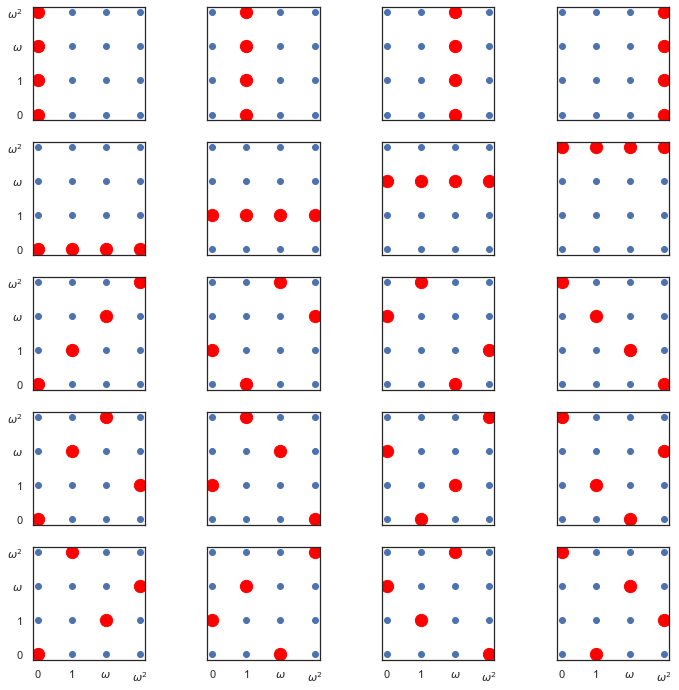

In [46]:
fig, axes = plt.subplots(figsize=(12,12),
                         nrows=5, ncols=4,
                         sharex=True, sharey=True)

plt.setp(axes,
         xticks=[0,1,2,3],
         xticklabels=[r'0', r'1', r'$\omega$', r'$\omega^2$'],
         yticks=[0,1,2,3],
         yticklabels=[r'0', r'1', r'$\omega$', r'$\omega^2$'])

points = np.array([0,1,2,3], dtype=np.int64)
points = np.array([(x,y) for x in points for y in points])

for grp in axes:
    for ax in grp:
        ax.set_box_aspect(1)
#         ax.set_frame_on(False)
        ax.scatter(*zip(*points)) # phase space

# como automatizamos ésto?
ray1 = ray(0,1)
ray2 = ray(1,0)
ray3 = ray(1,1)
ray4 = ray(1,w)
ray5 = ray(w,1)

size = 150.0

for i,k in enumerate(z4):
    line = [p + vector(Z4, [k,0]) for p in ray1]
    axes[0][i].scatter(*zip(*toLine(line)), s = size, c='red')

    line = [p + vector(Z4, [0,k]) for p in ray2]
    axes[1][i].scatter(*zip(*toLine(line)), s = size, c='red')

    line = [p + vector(Z4, [0,k]) for p in ray3]
    axes[2][i].scatter(*zip(*toLine(line)), s = size, c='red')

    line = [p + vector(Z4, [0,k]) for p in ray4]
    axes[3][i].scatter(*zip(*toLine(line)), s = size, c='red')

    line = [p + vector(Z4, [0,k]) for p in ray5]
    axes[4][i].scatter(*zip(*toLine(line)), s = size, c='red')

Parte fundamental de la geometría del espacio de fase son las *traslaciones*. Una traslación se define como la adición de un vector constante a un conjunto de puntos. Por ejemplo la adición del vector $(1,0)$ tiene el efecto de intercambiar las primeras dos columnas y las últimas dos:

In [35]:
print('Linea vertical 1:')
print(ray1)
print('Trasladado por (1,0):')
transl = [p + vector(Z4, [1,0]) for p in ray1]
print(transl)
print('Linea trasladada otra vez:')
print([p + vector(Z4, [1,0]) for p in transl])

Linea vertical 1:
[(0, 0), (0, 1), (0, w), (0, w + 1)]
Trasladado por (1,0):
[(1, 0), (1, 1), (1, w), (1, w + 1)]
Linea trasladada otra vez:
[(0, 0), (0, 1), (0, w), (0, w + 1)]


Denotamos $\mathcal T_\alpha$ a la traslación en el espacio de fase por el vector $\alpha = (q,p)$, definido por
$$
\mathcal T_\alpha \beta = \beta + \alpha.
$$

Una base de un campo $\mathbb F_{r^n}$ es un conjunto ordenado de elementos del campo $\{e_1,\dots,e_n\}$ tal que todo elemento $x$ del campo puede ser expresado como una combinación lineal:
$$
x = x^i e_i,
\quad x^i \in \mathbb F_r.
$$
Generalmente la base no es única. Para $\mathbb F_4$ posibles bases son $(1,\omega)$, $(1,\omega^2)$ o $(\omega, \omega^2)$. También necesitamos el concepto de la base *dual*, la cual se define a partir de la *traza* de una elemento del campo $\text{tr} : \mathbb F_{r^n} \to \mathbb F_{r}$:
$$
\text{tr} x = x + x^r + x^{r^2} + \cdots + x^{r^n-1}.
$$
La traza es lineal $\text{tr}(ax + y) = a \text{tr} x + \text{tr} y$ cuando $a \in \mathbb F_{r}$. Dada una base $E = (e_1,\dots,e_n)$ para $\mathbb F_{r^n}$, existe una base única $\tilde E = (\tilde e_1,\dots,\tilde e_n)$ tal que
$$
\text{tr}(e_i \tilde e_j) = \delta^i_j,
$$
llamada la base dual a $E$. Podemos utilizar la traza para obtener los coeficientes de expansión de un elemento en términos de la base:
$$
\text{tr}(x \tilde e_j)
= x^i \text{tr}(e_i \tilde e_j) = x^i \delta^j_i
= x^j.
$$

---

Para darle una interpretación cuántica al espacio de fase discreto, procedemos a asignar a cada linea en el espacio discreto, un estado cuántico representado por un operador de proyección en el espacio de Hilbert. Sea $Q$ la función que hace ésta asignación. Le imponemos a $Q$ la restricción de que debe ser *covariante bajo traslaciones*. Si $Q$ satisface ésta restricción, entonces Wootters la nombra *red cuántica*.

Para $N = r^n$ donde $r$ es primo, el espacio de fase corresponde a un sistema $n$ partículas, cada una representada por un espacio de Hilbert de dimensión $r$.

Para definir la propiedad de covarianza bajo traslaciones, requerimos construir operadores de traslación análogos al caso continuo. Para cada traslación en el espacio de fase $\mathcal T_{(x,y)}$, tenemos un operador unitario $T_{(x,y)}$ que actua en el espacio de Hilbert. Wootters se guía con tres principios en la elección de éstos operadores:

1. La multiplicación de los operadores debe imitar la composición de traslaciones, i.e., $T_\alpha T_\beta \approx T_{\alpha + \beta},$ donde la aproximación significa que son iguales salvo un factor de fase sin significado físico.

2. Debe haber traslaciones básicas que corresponden a operadores unitarios que solamente actúan sobre una partícula. Para lograr ésto, Wootters expande los elementos $x$ y $y$ de una traslación $(x,y)$ en *dos* bases, una para cada dimensión del espacio de fase. Luego asocia el $i$-ésimo componente de las expansiones, $x_{(e)}^i$ y $y_{(f)}^i$, con la $i$-ésima partícula. Una traslación que solo contiene a los coeficientes de un $i$ en partícular debe afectar solamente a la $i$-ésima partícula.

3. Y en el caso de una sola partícula, elegimos los operadores unitarios de la manera más análoga al caso de los operadores continuos. Si $\{|0\rangle,\dots,|r-1\rangle\}$ es la base estándar para una partícula, entonces una *traslación horizontal unitaria*, para la $i$-ésima partícula con $x_{(e)}^i = 1, y_{(f)}^i = 0$, se asocia con el operador unitario $X$ definido como $X|k\rangle = |k+1\rangle$ donde la adición es en $\mathbb F_r$. Similarmente la *traslación vertical unitaria* con $x_{(e)}^i = 0, y_{(f)}^i = 1$ corresponde al oeprador $Z$ definido como $Z|k\rangle = e^{2\pi i k / r} |k\rangle$.

Los operadores $X$ y $Z$ son los operadores de Pauli generalizados. Salvo factores de fase, los operadores unitarios de traslaciones en general ya quedan fijos:

$$
T_{(x,y)}
= X^{x_e^1} Z^{y_f^1} \otimes \cdots \otimes X^{x_e^n} Z^{y_f^n}.
$$

Con la definición de los operadores de traslación, podemos definir la covarianza bajo traslaciones de una red cuántica: $Q$ es covariante bajo traslaciones si para cada linea $\lambda$ y cada vector $\alpha$ se cumple:
$$
Q(\mathcal T_\alpha \lambda)
= T_\alpha Q(\lambda) T_\alpha^*.
$$

Para ver que tan fuerte es éste requerimiento, consideremos la linea que consiste de los puntos $(sx,sy)$ donde $s \in \mathbb F_N$. Ésta linea y las lineas de su estría son invariantes bajo la traslación por el vector $(sx,sy)$ para todo valor de $s$.

In [43]:
line = ray(1,1)
p    = vector(Z4, [1,1])

for k in z4:
    l = [x + vector(Z4, [k,0]) for x in line]
    for x in l:
        if not x + p in l:
            raise Exception('No es invariante!')
print('La estría es invariante.')

La estría es invariante.


Lo anterior significa que las proyecciones $Q$ que asignamos a cada linea deben conmutar con $T_{(sx,sy)}$ para *cada* valor de $s$. Pero ésto es imposible al menos que todos los operadores $T_{(sx,sy)}$ conmutan entre ellos. Veamos:

$$
Q(\lambda)
= Q(\mathcal T_{(sx,sy)} \lambda)
= T_{(sx,sy)} Q(\lambda) T_{(sx,sy)}^*.
$$

Wootters prueba que los $N$ operadores $T_{(sx,sy)}$ conmutan entre sí, sí y solo sí las bases satisfacen $f_i = m \tilde e_i$ para $i = 1,\dots,n$. Los operadores de traslación son de traza nula y además son mutuamente ortogonales en el sentido:

$$
\text{Tr}\left(
T_{(sx,sy)}^* T_{(tx,ty)}
\right)
= 0,
\quad s \neq t.
$$

Se sigue que los operadores definen un base *única* de eigenvectores simultáneos. Por lo tanto el requisito de la covarianza bajo traslación *escoge* una base ortogonal única del espacio de Hilbert asociada a cada estría. Además, dichas bases son mutuamente insesgadas!

Naturalmente procedemos a calcular las bases correspondientes a las estrías verticales y horizontales.